###  Import pustaka yang diperlukan

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageEnhance
from PIL import Image
%matplotlib inline

### Membaca gambar asli

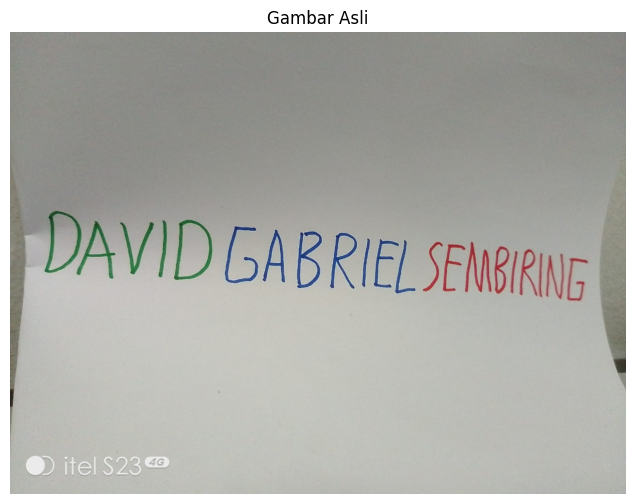

In [24]:
img = cv2.imread("nama.jpg")
if img is None:
    raise ValueError("Gambar tidak ditemukan! Periksa kembali path yang Anda masukkan.")

# Konversi BGR ke RGB untuk ditampilkan dengan Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

### DETEKSI WARNA PADA CITRA

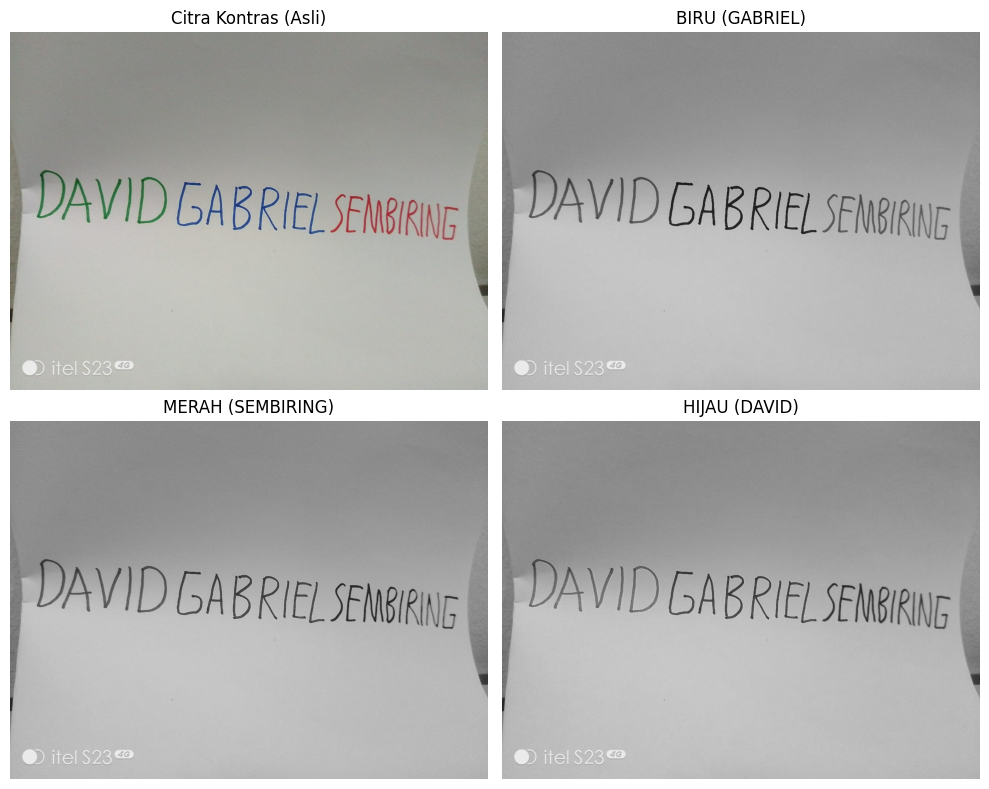

In [25]:
image = cv2.imread('nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img_rgb)

# Buat salinan untuk manipulasi
blue_faded = img_rgb.copy()
red_faded = img_rgb.copy()

lower_blue = np.array([100, 50, 50])  # Rentang warna biru
upper_blue = np.array([140, 255, 255])
hsv_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

blue_faded[blue_mask > 0] = blue_faded[blue_mask > 0] // 2  # Mengurangi intensitas warna biru

lower_red1 = np.array([0, 120, 70])    # Rentang merah pertama
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])  # Rentang merah kedua
upper_red2 = np.array([180, 255, 255])
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

red_faded[red_mask > 0] = red_faded[red_mask > 0] // 2  # Mengurangi intensitas warna merah

fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 baris, 2 kolom

# Citra Asli
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Citra Kontras (Asli)")
axes[0, 0].axis('off')

# Channel Biru (Efek Pudar untuk "febri")
axes[0, 1].imshow(cv2.cvtColor(blue_faded, cv2.COLOR_RGB2GRAY), cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("BIRU (GABRIEL)")
axes[0, 1].axis('off')

# Channel Merah (Efek Pudar untuk "ansyah")
axes[1, 0].imshow(cv2.cvtColor(red_faded, cv2.COLOR_RGB2GRAY), cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title("MERAH (SEMBIRING)")
axes[1, 0].axis('off')

# Channel Hijau (Tidak Ada Perubahan)
axes[1, 1].imshow(g, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title("HIJAU (DAVID)")
axes[1, 1].axis('off')

# Atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

### Buat histogram untuk setiap saluran warna

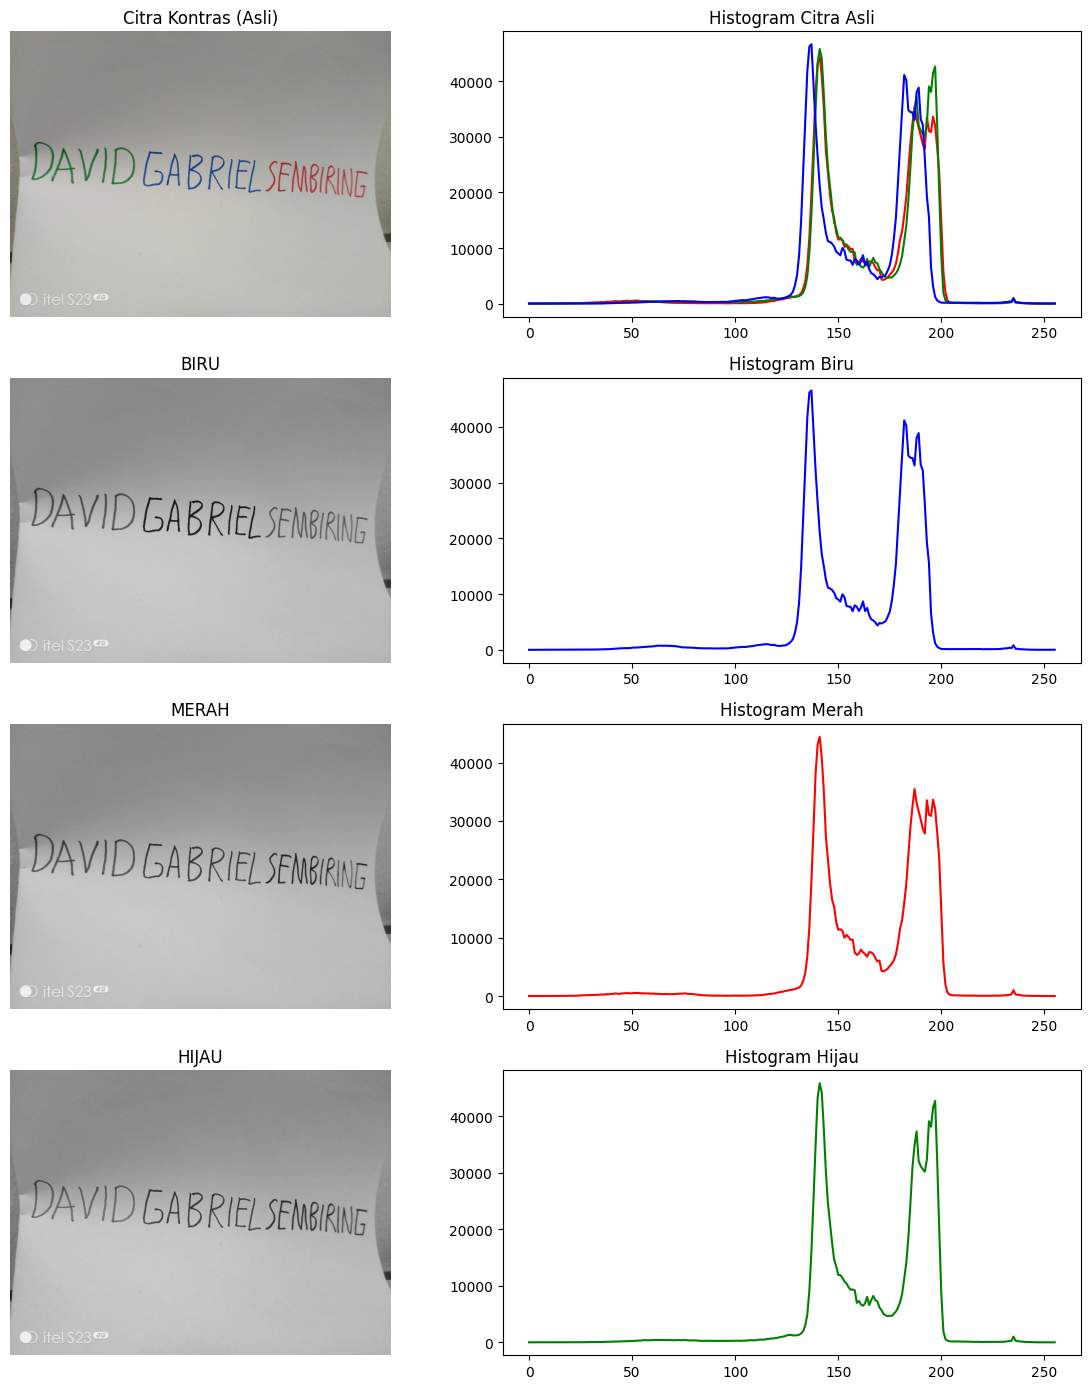

In [26]:
image = cv2.imread('nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel RGB
r, g, b = cv2.split(img_rgb)

# Deteksi warna di HSV
hsv_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Masking biru
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
blue_faded = img_rgb.copy()
blue_faded[blue_mask > 0] = blue_faded[blue_mask > 0] // 2

# Masking merah
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)
red_faded = img_rgb.copy()
red_faded[red_mask > 0] = red_faded[red_mask > 0] // 2

# Tampilkan gambar dan histogram
fig, axes = plt.subplots(4, 2, figsize=(12, 14))

# Citra Asli
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Citra Kontras (Asli)")
axes[0, 0].axis('off')

colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    axes[0, 1].plot(hist, color=col)
axes[0, 1].set_title("Histogram Citra Asli")

# Biru
axes[1, 0].imshow(cv2.cvtColor(blue_faded, cv2.COLOR_RGB2GRAY), cmap='gray')
axes[1, 0].set_title("BIRU")
axes[1, 0].axis('off')

blue_hist = cv2.calcHist([blue_faded], [2], None, [256], [0, 256])  # Blue channel = index 2
axes[1, 1].plot(blue_hist, color='b')
axes[1, 1].set_title("Histogram Biru")

# Merah
axes[2, 0].imshow(cv2.cvtColor(red_faded, cv2.COLOR_RGB2GRAY), cmap='gray')
axes[2, 0].set_title("MERAH")
axes[2, 0].axis('off')

red_hist = cv2.calcHist([red_faded], [0], None, [256], [0, 256])  # Red channel = index 0 in RGB (OpenCV uses BGR)
axes[2, 1].plot(red_hist, color='r')
axes[2, 1].set_title("Histogram Merah")

# Hijau
axes[3, 0].imshow(g, cmap='gray')
axes[3, 0].set_title("HIJAU")
axes[3, 0].axis('off')

green_hist = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])  # Green channel = index 1
axes[3, 1].plot(green_hist, color='g')
axes[3, 1].set_title("Histogram Hijau")

plt.tight_layout()
plt.show()

### AMBANG BATAS TERKECIL SAMPAI DENGAN TERBESAR

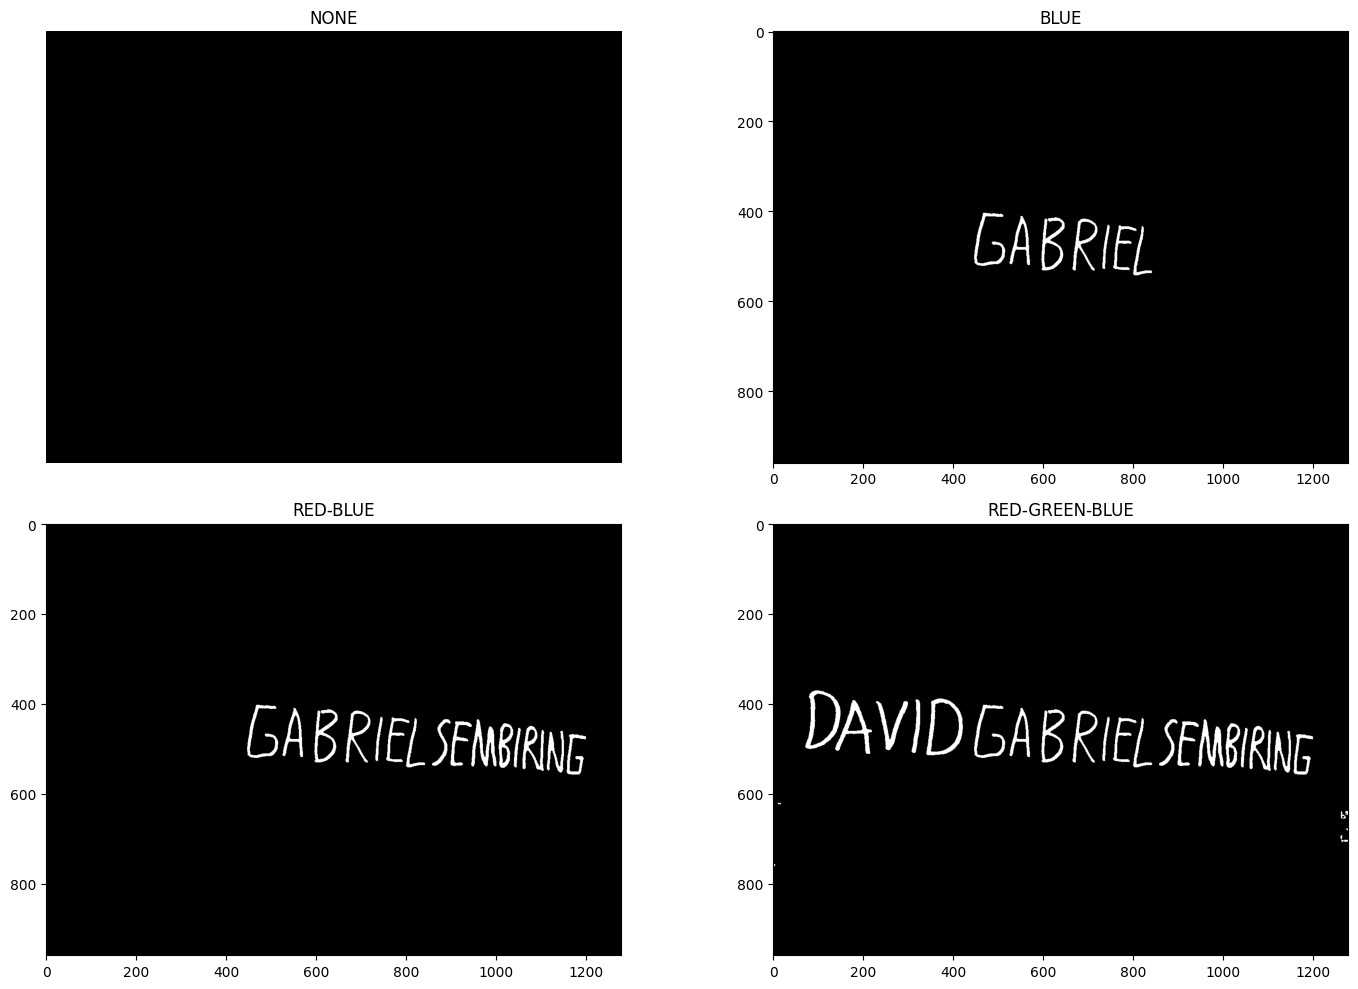

In [27]:
image = cv2.imread('nama.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Buat background hitam
background = np.zeros_like(image)

# Fungsi bantu untuk membuat mask HSV
def get_hsv_mask(hsv_img, lower, upper):
    mask = cv2.inRange(hsv_img, np.array(lower), np.array(upper))
    return mask

# Mask biru (hue sekitar 100–140)
blue_mask = get_hsv_mask(hsv, [100, 50, 50], [140, 255, 255])

# Mask merah (hue sekitar 0–10 dan 160–180)
red_mask1 = get_hsv_mask(hsv, [0, 50, 50], [10, 255, 255])
red_mask2 = get_hsv_mask(hsv, [160, 50, 50], [180, 255, 255])
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Mask hijau (hue sekitar 40–85) → dilebarkan range-nya
green_mask = get_hsv_mask(hsv, [35, 40, 40], [85, 255, 255])

# PERBAIKI: tambahkan dilasi kecil hanya untuk hijau
kernel = np.ones((2, 2), np.uint8)
green_mask_dilated = cv2.dilate(green_mask, kernel, iterations=1)

# Gabungkan sesuai kategori
# BLUE only
blue_image = background.copy()
blue_image[blue_mask > 0] = [255, 255, 255]

# RED + BLUE
red_blue_mask = cv2.bitwise_or(red_mask, blue_mask)
red_blue_image = background.copy()
red_blue_image[red_blue_mask > 0] = [255, 255, 255]

# RED + GREEN + BLUE (pakai green yang sudah didilate)
rgb_mask = cv2.bitwise_or(red_blue_mask, green_mask_dilated)
rgb_image = background.copy()
rgb_image[rgb_mask > 0] = [255, 255, 255]

# Tampilkan hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title("NONE")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
plt.title("BLUE")
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(red_blue_image, cv2.COLOR_BGR2RGB))
plt.title("RED-BLUE")
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("RED-GREEN-BLUE")
plt.axis('on')

plt.tight_layout()
plt.show()


### Memperbaiki Gambar Backlight

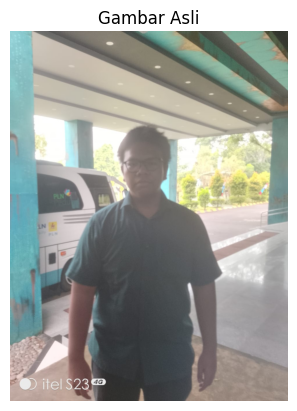

In [28]:
img = Image.open("foto.jpg")  # Ganti nama file sesuai gambar asli
plt.imshow(img)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()


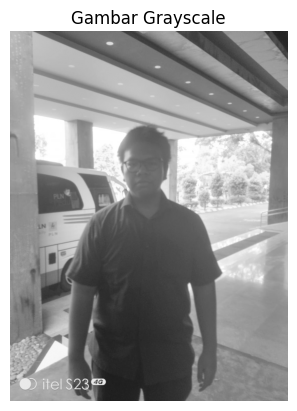

In [29]:
# 2. Konversi ke grayscale
gray_img = img.convert("L")
plt.imshow(gray_img, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis("off")
plt.show()

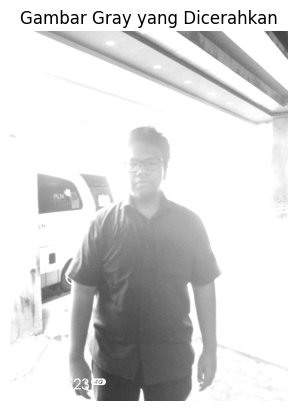

In [30]:
enhancer_brightness = ImageEnhance.Brightness(gray_img)
bright_img = enhancer_brightness.enhance(1.8)  # Nilai >1 meningkatkan kecerahan
plt.imshow(bright_img, cmap='gray')
plt.title("Gambar Gray yang Dicerahkan")
plt.axis("off")
plt.show()

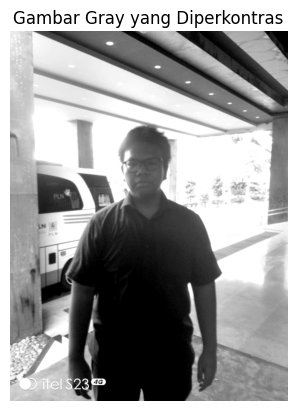

In [31]:
enhancer_contrast = ImageEnhance.Contrast(gray_img)
contrast_img = enhancer_contrast.enhance(2.0)  # Nilai >1 meningkatkan kontras
plt.imshow(contrast_img, cmap='gray')
plt.title("Gambar Gray yang Diperkontras")
plt.axis("off")
plt.show()

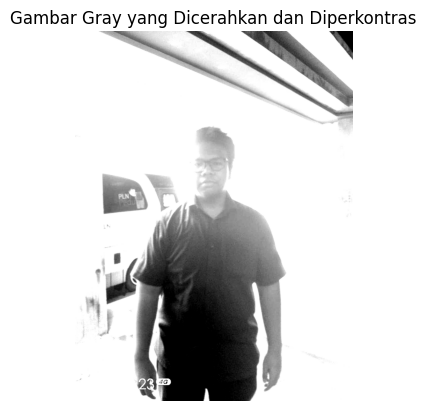

In [32]:
combined_img = ImageEnhance.Brightness(gray_img).enhance(1.8)
combined_img = ImageEnhance.Contrast(combined_img).enhance(2.0)

plt.imshow(combined_img, cmap='gray')
plt.title("Gambar Gray yang Dicerahkan dan Diperkontras")
plt.axis("off")
plt.show()